<a href="https://colab.research.google.com/github/cppel/dz/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)


In [2]:
from tensorflow import keras

(trainX, trainY), (testX, testY) = keras.datasets.cifar100.load_data()
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255


trainY = keras.utils.to_categorical(trainY, 100)
testY = keras.utils.to_categorical(testY, 100)

print('Train: X = ', trainX.shape)
print('Train: Y = ', trainY.shape)
print()
print('Test: X = ', testX.shape)
print('Test: Y = ', testY.shape)

169001437/169001437 [==============================] - 6s 0us/step
Train: X =  (50000, 32, 32, 3)
Train: Y =  (50000, 100)

Test: X =  (10000, 32, 32, 3)
Test: Y =  (10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [3]:
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(100))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [4]:
batch_size = 128
epochs = 10

In [5]:
model_1_history = model_1.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 18s 14ms/step - loss: 3.7729 - accuracy: 0.1275 - val_loss: 3.2713 - val_accuracy: 0.2163
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 2.9811 - accuracy: 0.2665 - val_loss: 2.8354 - val_accuracy: 0.3045
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 2.5626 - accuracy: 0.3541 - val_loss: 2.6100 - val_accuracy: 0.3508
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 2.2523 - accuracy: 0.4194 - val_loss: 2.4998 - val_accuracy: 0.3735
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 1.9760 - accuracy: 0.4806 - val_loss: 2.4607 - val_accuracy: 0.3923
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.7238 - accuracy: 0.5351 - val_loss: 2.4759 - val_accuracy: 0.4011
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 1.4696 - accuracy: 0.5958 - val_loss: 2.5480 - val_accuracy: 0.402

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [6]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(Dense(100))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

In [7]:
batch_size = 128
epochs = 10

model_2_history = model_2.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 10s 15ms/step - loss: 3.2607 - accuracy: 0.2337 - val_loss: 5.3102 - val_accuracy: 0.0557
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 2.2860 - accuracy: 0.4137 - val_loss: 2.9728 - val_accuracy: 0.3057
Epoch 3/10
391/391 [==============================] - 5s 14ms/step - loss: 1.7584 - accuracy: 0.5355 - val_loss: 2.4745 - val_accuracy: 0.3827
Epoch 4/10
391/391 [==============================] - 5s 14ms/step - loss: 1.2982 - accuracy: 0.6492 - val_loss: 3.0278 - val_accuracy: 0.3377
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 0.8500 - accuracy: 0.7700 - val_loss: 2.5387 - val_accuracy: 0.4180
Epoch 6/10
391/391 [==============================] - 5s 14ms/step - loss: 0.4588 - accuracy: 0.8853 - val_loss: 2.7213 - val_accuracy: 0.4226
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 0.2115 - accuracy: 0.9567 - val_loss: 2.9382 - val_accuracy: 0.408

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [8]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [9]:
batch_size = 128
epochs = 20
model_3_history = model_3.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
391/391 [==============================] - 8s 14ms/step - loss: 4.0823 - accuracy: 0.0742 - val_loss: 3.5960 - val_accuracy: 0.1535
Epoch 2/20
391/391 [==============================] - 6s 14ms/step - loss: 3.4161 - accuracy: 0.1832 - val_loss: 3.0169 - val_accuracy: 0.2686
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 3.0695 - accuracy: 0.2461 - val_loss: 2.7779 - val_accuracy: 0.3151
Epoch 4/20
391/391 [==============================] - 5s 14ms/step - loss: 2.8545 - accuracy: 0.2876 - val_loss: 2.6398 - val_accuracy: 0.3441
Epoch 5/20
391/391 [==============================] - 5s 14ms/step - loss: 2.7021 - accuracy: 0.3173 - val_loss: 2.5162 - val_accuracy: 0.3703
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 2.5656 - accuracy: 0.3449 - val_loss: 2.4109 - val_accuracy: 0.3858
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 2.4599 - accuracy: 0.3653 - val_loss: 2.3201 - val_accuracy: 0.4069

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [10]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

model_4.add(Dense(512))
model_4.add(Activation('relu'))

model_4.add(Dropout(0.5))
model_4.add(Dense(100))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

In [11]:
batch_size = 512
epochs = 25
model_4_history = model_4.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/25
98/98 [==============================] - 11s 65ms/step - loss: 4.3524 - accuracy: 0.0634 - val_loss: 5.7439 - val_accuracy: 0.0151
Epoch 2/25
98/98 [==============================] - 5s 52ms/step - loss: 3.7367 - accuracy: 0.1406 - val_loss: 5.0141 - val_accuracy: 0.0231
Epoch 3/25
98/98 [==============================] - 5s 52ms/step - loss: 3.4187 - accuracy: 0.1912 - val_loss: 5.1661 - val_accuracy: 0.0319
Epoch 4/25
98/98 [==============================] - 5s 51ms/step - loss: 3.1766 - accuracy: 0.2283 - val_loss: 3.9018 - val_accuracy: 0.1175
Epoch 5/25
98/98 [==============================] - 5s 54ms/step - loss: 2.9766 - accuracy: 0.2671 - val_loss: 3.2677 - val_accuracy: 0.2227
Epoch 6/25
98/98 [==============================] - 5s 52ms/step - loss: 2.8154 - accuracy: 0.2957 - val_loss: 2.8217 - val_accuracy: 0.3001
Epoch 7/25
98/98 [==============================] - 5s 52ms/step - loss: 2.6607 - accuracy: 0.3245 - val_loss: 2.5711 - val_accuracy: 0.3518
Epoch 8/25
9

Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

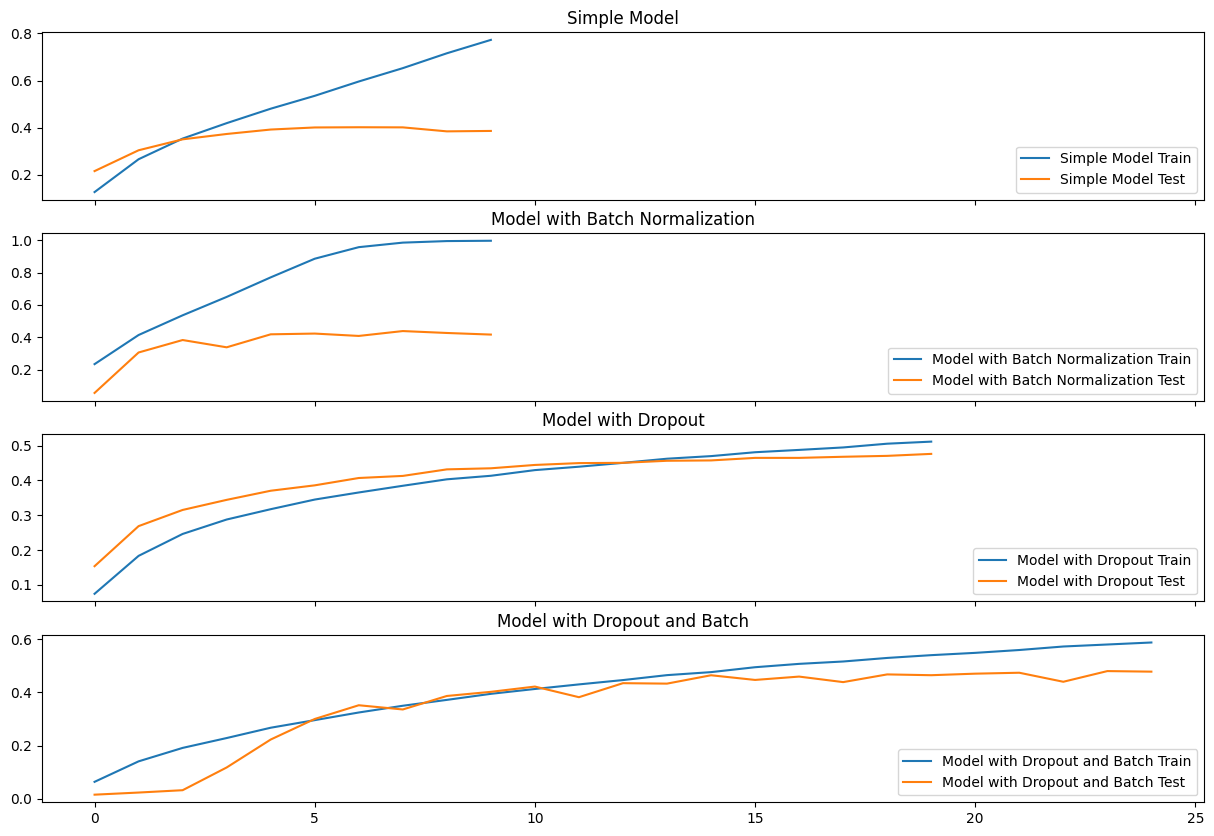

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt, model4Plt) = plt.subplots(4, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model1Plt.set_title("Simple Model")
model1Plt.plot(model_1_history.history['accuracy'])
model1Plt.plot(model_1_history.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(model_2_history.history['accuracy'])
model2Plt.plot(model_2_history.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(model_3_history.history['accuracy'])
model3Plt.plot(model_3_history.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(model_4_history.history['accuracy'])
model4Plt.plot(model_4_history.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")

Ваши выводы
Как видно из модели, из графиков, нормалищация батчами не значительно изменяет обучение и конечную точность модели. Dropout, а также Dropout совмещенный с нормализацией батчами значительно увеличивают эффективность модели, но в то же самое время увеличивают и количество эпох, необходимое для ее обучения

Ваш итог
Самую высокую точность показала модели использующая нормализацию батчами и Dropout, обучавшаяся в течение 25 эпох.

Ее точность составила: 48.39%